# Pymaceuticals Inc.
---

### Analysis

1. Mice who received treatments of Capomulin and Ramicane had the lowest average tumor volume and smallest variance of all treatments 2. Ketapril and Naftisol had the highest average tumor volume and largest variance of all treatments 3.There was a strong positive correlation between mouse weight and the average tumor volume (r(249)=0.84, p <.01).
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
len(mouse_df["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_rows = mouse_df[duplicates]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_no_duplicates = mouse_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
df_no_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(df_no_duplicates["Mouse ID"].unique())

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_volume = mouse_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_vol = tumor_volume[['Tumor Volume (mm3)']].mean()
mean_vol.head(20)
median_vol = tumor_volume[['Tumor Volume (mm3)']].median()
median_vol.head(20)
var_vol = tumor_volume[['Tumor Volume (mm3)']].var()
var_vol.head(20)
var_std_dev = tumor_volume[['Tumor Volume (mm3)']].std()
var_std_dev.head(20)
var_std_err = tumor_volume[['Tumor Volume (mm3)']].sem()
var_std_err.head(20)

#Assemble the resulting series into a single summary DataFrame.
vol_summary_df = pd.DataFrame(
{"Mean Tumor Volume" : mean_vol ['Tumor Volume (mm3)'],
"Median Tumor Volume" : median_vol ['Tumor Volume (mm3)'],
"Tumor Volume Variance" : var_vol ['Tumor Volume (mm3)'],
"Tumor Volume Std. Dev." : var_std_dev ['Tumor Volume (mm3)'],
"Tumor Volume Std. Err." : var_std_err ['Tumor Volume (mm3)'],
})

vol_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_summary = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
grouped_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

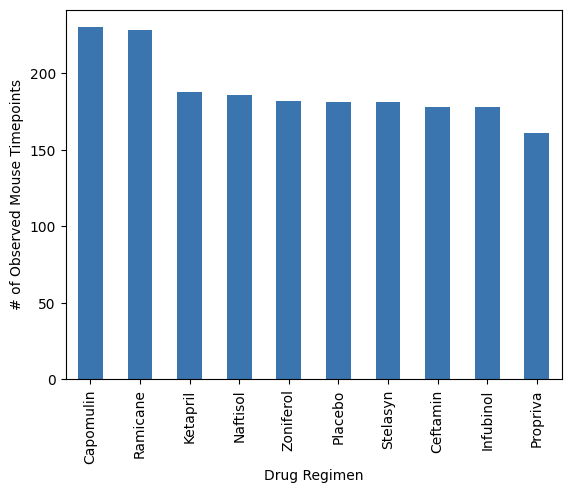

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Creating a bar plot

grouped_data = mouse_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)

# Creating the bar chart using Pandas plot function
grouped_data.plot(kind='bar', color='#3A75AF', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')


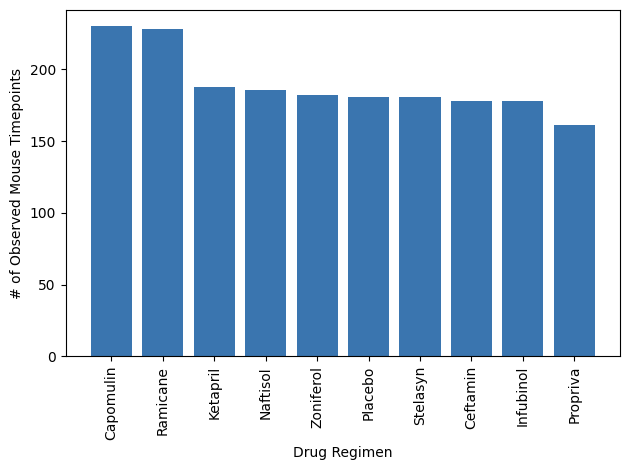

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

grouped_data = mouse_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)

# Creating a bar chart
plt.bar(grouped_data.index, grouped_data.values, color='#3A75AF')

# Labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

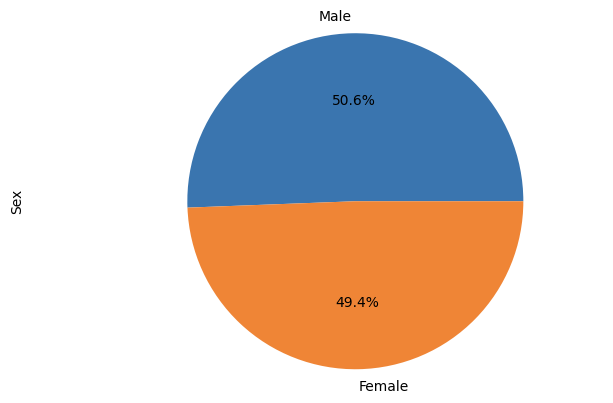

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = mouse_df['Sex'].value_counts()

labels = gender_counts.index

# Create a pie plot
gender_counts.plot(kind='pie', labels=labels, autopct='%1.1f%%', colors=['#3A75AF', '#ef8536'])

# Adding labels and title
plt.ylabel('Sex', rotation=90, labelpad=60)
plt.axis('equal') 

# Show the pie plots
plt.show()

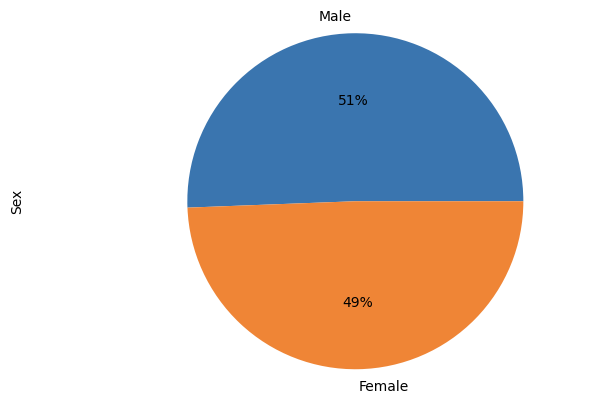

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = mouse_df['Sex'].value_counts()

# Create a pie plot using Matplotlib's pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.0f%%', colors=['#3A75AF', '#ef8536'])

# Set aspect ratio to be equal to draw the pie as a circle
plt.ylabel('Sex', rotation=90, labelpad=60)
plt.axis('equal')

# Show the pie plot
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_regimens = mouse_df[mouse_df["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
# max_timepoint = filtered_regimens[filtered_regimens['Timepoint'] == filtered_regimens['Timepoint'].max()]
max_timepoint = filtered_regimens[['Mouse ID', 'Timepoint']].groupby('Mouse ID').max()
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume = pd.merge(max_timepoint, mouse_df, on=['Mouse ID', 'Timepoint'], how='left')
final_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = final_volume['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in treatment_list:
    print("Regimen: " + regimen)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = final_volume.groupby('Drug Regimen').get_group(regimen)

    quartiles = regimen_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"  Values below {lower_bound} or above {upper_bound} could be outliers.")

    outliers = regimen_data.loc[(regimen_data['Tumor Volume (mm3)'] < lower_bound) | (regimen_data['Tumor Volume (mm3)'] > upper_bound)]
    print(f"  Outliers: {outliers['Tumor Volume (mm3)']}")


Regimen: Infubinol
  Values below 36.83290494999999 or above 82.74144559000001 could be outliers.
  Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Regimen: Ceftamin
  Values below 25.355449580000002 or above 87.66645829999999 could be outliers.
  Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Regimen: Ramicane
  Values below 17.912664470000003 or above 54.30681135 could be outliers.
  Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Regimen: Capomulin
  Values below 20.70456164999999 or above 51.83201549 could be outliers.
  Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<Figure size 800x600 with 0 Axes>

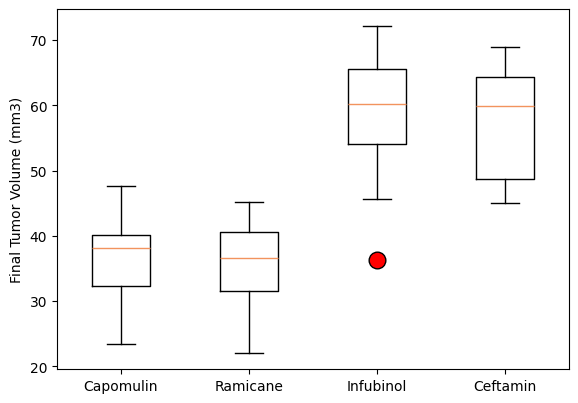

In [55]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))

df_sorted = final_volume.sort_values(by='Tumor Volume (mm3)')
order = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
df_sorted['Drug Regimen'] = pd.Categorical(df_sorted['Drug Regimen'], categories=order, ordered=True)

# Sort by 'Drug Regimen'
df_sorted.sort_values('Drug Regimen', inplace=True)

# Now create the boxplot
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none', markeredgecolor='black')
df_sorted.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False, showfliers=True, color=dict(boxes='black', whiskers='black', medians='#f2935d', caps='black'), flierprops=flierprops)

plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('')
plt.suptitle('')
plt.title('')
plt.show()


## Line and Scatter Plots

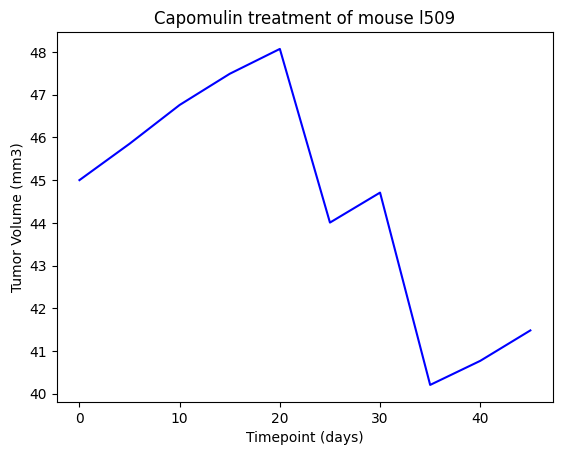

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_509 = mouse_df[mouse_df['Mouse ID'] == 'l509']
mouse_509

# Plotting the line plot
plt.plot(mouse_509['Timepoint'], mouse_509['Tumor Volume (mm3)'], linestyle='-', color='blue')

# Adding labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

# Show the plot
plt.show()

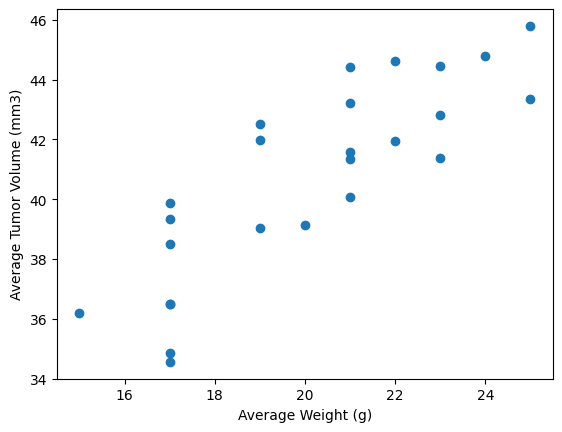

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_mice = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin'][['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']]

average_values = cap_mice.groupby('Mouse ID').mean()

plt.scatter(average_values['Weight (g)'], average_values['Tumor Volume (mm3)'])

plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.8419363424694722


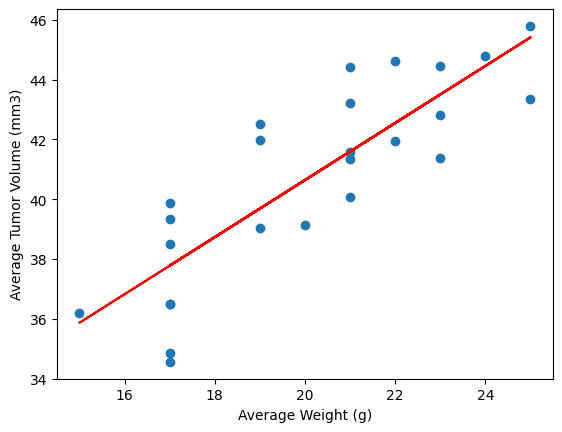

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

cap_mice = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin'][['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']]

average_values = cap_mice.groupby('Mouse ID').mean()

plt.scatter(average_values['Weight (g)'], average_values['Tumor Volume (mm3)'])

plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Linear regression
x = np.array(average_values['Weight (g)']).reshape(-1, 1)
y = np.array(average_values['Tumor Volume (mm3)'])

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red', label='Linear Regression')

correlation = np.corrcoef(average_values['Weight (g)'], average_values['Tumor Volume (mm3)'])[0, 1]
print("The correlation between mouse weight and the average tumor volume is ", correlation)


plt.show()
